In [17]:
#IMPORT LIBRARIES
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [20]:
#load the dataset
df = pd.read_csv(r"C:\Users\User\Downloads\sales\Advertising Budget and Sales.csv", encoding= 'unicode_escape')

In [21]:
#display the first few rows
df.head()

,Unnamed: 0,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($),Sales ($)
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [23]:
# Get statistical summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               200 non-null    int64  
 1   TV Ad Budget ($)         200 non-null    float64
 2   Radio Ad Budget ($)      200 non-null    float64
 3   Newspaper Ad Budget ($)  200 non-null    float64
 4   Sales ($)                200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [24]:

df.shape

(200, 5)

In [25]:
# Get statistical summary of the dataset
df.describe()

,Unnamed: 0,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($),Sales ($)
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [26]:
# its un named we have nothing to do with it
df.drop(columns = 'Unnamed: 0' ,inplace=True,axis=1)

In [27]:
#check for missing values
df.isnull().sum()

TV Ad Budget ($)           0
Radio Ad Budget ($)        0
Newspaper Ad Budget ($)    0
Sales ($)                  0
dtype: int64

In [28]:
# Check data types
df.dtypes

TV Ad Budget ($)           float64
Radio Ad Budget ($)        float64
Newspaper Ad Budget ($)    float64
Sales ($)                  float64
dtype: object

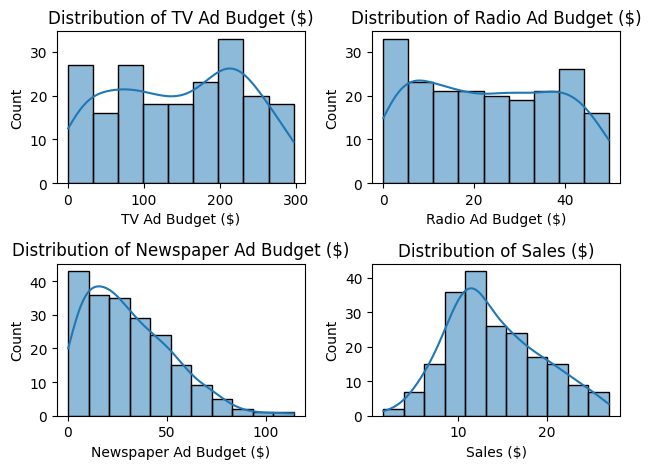

In [29]:
#Plot the distribution of individual features like TV, Radio, Newspaper, and Sales to understand their distribution.
features = ['TV Ad Budget ($)', 'Radio Ad Budget ($)', 'Newspaper Ad Budget ($)', 'Sales ($)']
for i, feature in enumerate(features, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
plt.savefig("Distributions of features")
plt.tight_layout()
plt.show()

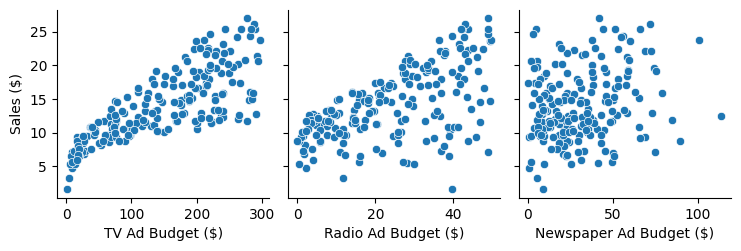

In [30]:
#Analyze the relationship between each advertising channel (TV, Radio, Newspaper) and Sales. Scatter plots are effective for visualizing these relationships.
sns.pairplot(df, x_vars=['TV Ad Budget ($)', 'Radio Ad Budget ($)', 'Newspaper Ad Budget ($)'], y_vars='Sales ($)', kind='scatter')
plt.show()

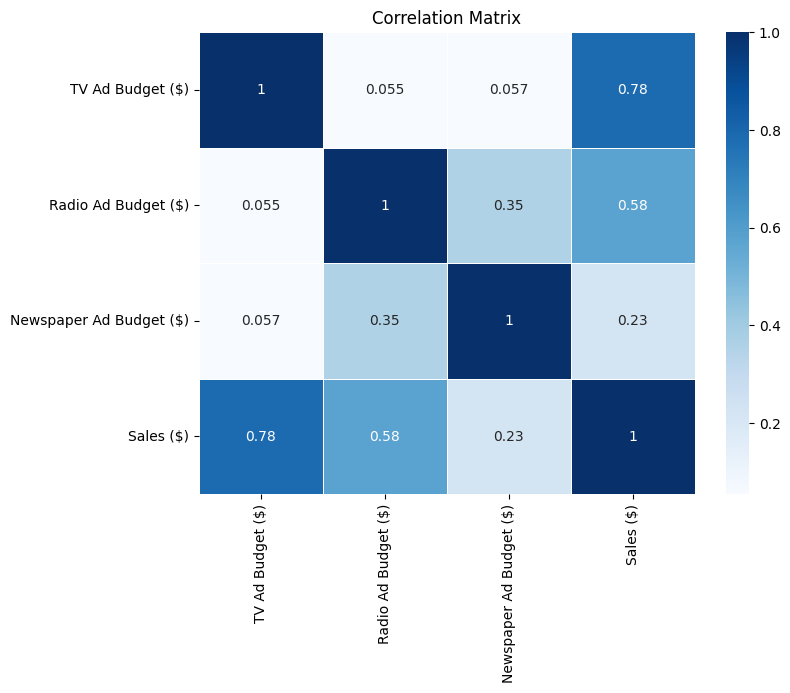

In [31]:
# Calculate the correlation matrix to see how features are correlated with each other. Visualize this matrix using a heatmap to easily identify strong correlations.
plt.figure(figsize=(8, 6))
corr_matrix = df.corr()
sns.heatmap(df.corr(), annot = True, cmap='Blues', linewidths=0.5)
plt.title('Correlation Matrix')
plt.savefig("Correlation Matrix Between Features")
plt.show()

In [32]:
# Define features and target variable
X = df.drop('Sales ($)', axis=1)  # Features
y = df['Sales ($)']  #Target Variable

In [34]:
X

,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($)
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [35]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [37]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [38]:
# Display the shapes of the resulting datasets
print(f"Training data shape: {X_train.shape}, {y_train.shape}")
print(f"Testing data shape: {X_test.shape}, {y_test.shape}")

Training data shape: (160, 3), (160,)
Testing data shape: (40, 3), (40,)


In [41]:
# Initialize the scaler
scaler = StandardScaler()

# Fit on training data and transform training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform test data
X_test_scaled = scaler.transform(X_test)


In [42]:
# Define the models
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [44]:

# Make predictions on training and testing data
y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

In [46]:
   # Calculate performance metrics for training data
    train_mae = mean_absolute_error(y_train, y_train_pred)
    train_mse = mean_squared_error(y_train, y_train_pred)
    train_r2 = r2_score(y_train, y_train_pred)
    train_accuracy = int(train_r2 * 100)
    
    # Calculate performance metrics for testing data
    test_mae = mean_absolute_error(y_test, y_test_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    test_accuracy = int(test_r2 * 100)

In [47]:
# Initialize lists to store metrics
metrics = {
    'Model': [],
    'Train MAE': [],
    'Train MSE': [],
    'Train R-squared': [],
    'Test MAE': [],
    'Test MSE': [],
    'Test R-squared': [],
    'Train Accuracy (%)': [],
    'Test Accuracy (%)': []
}

In [50]:
# Append metrics to the lists
    metrics['Train MAE'].append(train_mae)
    metrics['Train MSE'].append(train_mse)
    metrics['Train R-squared'].append(train_r2)
    metrics['Test MAE'].append(test_mae)
    metrics['Test MSE'].append(test_mse)
    metrics['Test R-squared'].append(test_r2)
    metrics['Train Accuracy (%)'].append(train_accuracy)
    metrics['Test Accuracy (%)'].append(test_accuracy)


In [51]:
# Convert the metrics dictionary to a DataFrame
metrics_df = pd.DataFrame(metrics)

# Display the metrics DataFrame
print(metrics_df)

   Train MAE  Train MSE  Train R-squared  Test MAE  Test MSE  Test R-squared  \
0   1.198468   2.705129         0.895701  1.460757  3.174097        0.899438   
1   1.198468   2.705129         0.895701  1.460757  3.174097        0.899438   

   Train Accuracy (%)  Test Accuracy (%)  
0                  89                 89  
1                  89                 89  


In [ ]:
#Linear Regression: Shows almost perfect fit with very low MAE and MSE on both training and test sets. R-squared of 1.0 indicates potential overfitting. Accuracy: 89% (Train), 89% (Test).

